<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Artificial Neural Network with treated that
Authorship: Raul Macedo

Creates ANN with the first samples of data generated on `data_treatment.ipynb`

### Cases explanation:
- Case 1: All features (Result from Logistic Regression with penalty l1)
- Case 2: Take away T-TPT and P-MON-CKP (Result from scikit learn Lasso model)
- Case 3: Take away P-TPT and P-MON-CKP (Result from PCA) 

All ANN are created with MLPClassifier and it's parameters are determined by GridSearchCV: Cross validation along many different combinations of parameters.

In [37]:
#General imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from utils import train_model_if_doesnt_exist,save_csv_if_doesnt_exist


### Definindo teste e treino

In [38]:
train1 = pd.read_csv('./feature_selection_results/train1.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
train2 = pd.read_csv('./feature_selection_results/train2.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
train3 = pd.read_csv('./feature_selection_results/train3.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
test1 = pd.read_csv('./feature_selection_results/test1.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
test2 = pd.read_csv('./feature_selection_results/test2.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})
test3 = pd.read_csv('./feature_selection_results/test3.csv').drop(columns=["Unnamed: 0"]).rename(columns={'0':'class'})

In [39]:
train1.columns

Index(['P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL',
       'class'],
      dtype='object')

In [40]:
train_in1 = train1.drop(columns=['class']).copy()
test_in1 = test1.drop(columns=['class']).copy()
train_out1 = pd.DataFrame(train1['class'])
test_out1 = pd.DataFrame(test1['class'])

train_in2 = train2.drop(columns=['class']).copy()
test_in2 = test2.drop(columns=['class']).copy()
train_out2 = pd.DataFrame(train2['class'])
test_out2 = pd.DataFrame(test2['class'])

train_in3 = train3.drop(columns=['class']).copy()
test_in3 = test3.drop(columns=['class']).copy()
train_out3 = pd.DataFrame(train3['class'])
test_out3 = pd.DataFrame(test3['class'])

### **Normalização dos dados**
Será realizada normalização dos dados para 0 e 1

In [41]:

def normalize_data(data,range_=(0,1)):
  scaler = MinMaxScaler(feature_range=range_)
  return scaler.fit_transform(data),scaler


train_in1n,scaler_train_in1n = normalize_data(train_in1)
test_in1n,scaler_test_in1n = normalize_data(test_in1)
train_out1n,scaler_train_out1n = normalize_data(train_out1)
test_out1n,scaler_test_out1n = normalize_data(test_out1)

train_in2n,scaler_train_in2n = normalize_data(train_in2)
test_in2n,scaler_test_in2n = normalize_data(test_in2)
train_out2n,scaler_train_out2n = normalize_data(train_out2)
test_out2n,scaler_test_out2n = normalize_data(test_out2)

train_in3n,scaler_train_in3n = normalize_data(train_in3)
test_in3n,scaler_test_in3n = normalize_data(test_in3)
train_out3n,scaler_train_out3n = normalize_data(train_out3)
test_out3n,scaler_test_out3n = normalize_data(test_out3)


train_out1n = np.ravel(train_out1n)
train_out2n = np.ravel(train_out2n)
train_out3n = np.ravel(train_out3n)


## **Using GridSearchCV to determine MLP parameters and train model - Case 1**

In [42]:
parameters1 = {
    'hidden_layer_sizes': [(6,),(10,),(15,),(6,6),(6,4,4)],
    'activation': ['tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron1 = train_model_if_doesnt_exist(train_in1n,train_out1n,parameters1,'./ann_models/pre_data_filling/ultron1_PRP.pkl')


In [43]:
ultron1

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 6), max_iter=100)

Text(0, 0.5, 'erro')

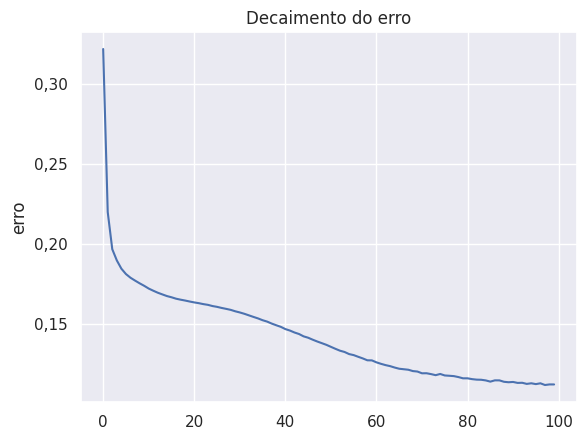

In [44]:
plt.plot(ultron1.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')


### **Analising model with test data - case 1**


In [45]:

def plot_confusion_matrix(observed_data:np.ndarray,predicted_data:np.ndarray):
    sns.set(font_scale=2)
    mat = confusion_matrix(observed_data,predicted_data)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',linewidths=1)
    plt.xlabel('Observado')
    plt.ylabel('Predito')
    return

def save_classifaction_report(observed_data,predicted_data,file_name:str):
    cls_report = classification_report(observed_data,predicted_data,output_dict=True)
    cls_report_df = pd.DataFrame(cls_report)
    accuracy = accuracy_score(observed_data,predicted_data)
    cls_report_df['accuracy'] = accuracy
    save_csv_if_doesnt_exist(cls_report_df,file_name)
    print(cls_report_df)
    return

In [46]:
out1_pred_test1 = ultron1.predict(test_in1n)

# Denormalize data
out1_pred_test1_df = pd.DataFrame(out1_pred_test1)
out1_des_pred_test1 = scaler_test_out1n.inverse_transform(out1_pred_test1_df)

In [47]:
pd.DataFrame(classification_report(test_out1,out1_des_pred_test1,output_dict=True))
tn1, fp1, fn1, tp1 = confusion_matrix(test_out1, out1_des_pred_test1).ravel()
specificity = tn1 / (tn1+fp1)
specificity

0.5261431411530815

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.835781      0.953387  0.946529       0.894584       0.942492
recall         0.526143      0.989446  0.946529       0.757795       0.946529
f1-score       0.645763      0.971082  0.946529       0.808423       0.940946
support    10060.000000  98540.000000  0.946529  108600.000000  108600.000000


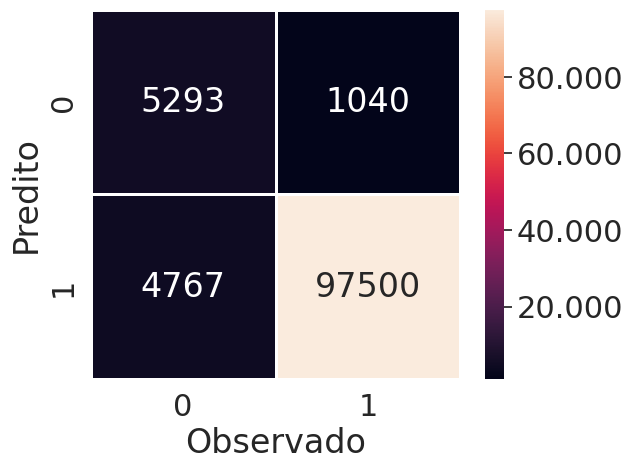

In [48]:
save_classifaction_report(test_out1,out1_des_pred_test1,'./ann_models/pre_data_filling/reports/ultron1_test_report.pkl')
plot_confusion_matrix(test_out1,out1_des_pred_test1)

### **Analising model with train data - case 1**


                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.849951       0.952324  0.946586       0.901137       0.942840
recall         0.514207       0.990732  0.946586       0.752469       0.946586
f1-score       0.640762       0.971148  0.946586       0.805955       0.940541
support    23475.000000  229923.000000  0.946586  253398.000000  253398.000000


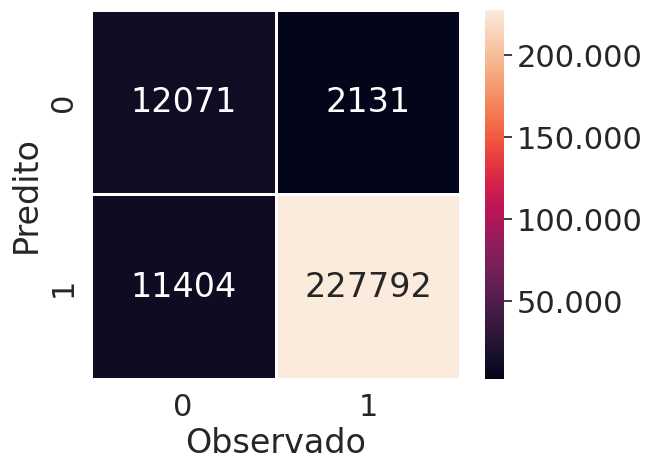

In [49]:
out1_pred_train1 = ultron1.predict(train_in1n)
out1_pred_train1_df = pd.DataFrame(out1_pred_train1)
out_des_pred1_train1 = scaler_train_out1n.inverse_transform(out1_pred_train1_df)

save_classifaction_report(train_out1,out_des_pred1_train1,'./ann_models/pre_data_filling/reports/ultron1_train_report.pkl')
plot_confusion_matrix(train_out1,out_des_pred1_train1)

# **Case 2 - Taking away T-TPT & P-MON-CKP**


## **Using GridSearchCV to determine MLP parameters and train model - Case 2**

In [50]:
parameters2 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(6,4,4)],
    'activation': ['tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron2 = train_model_if_doesnt_exist(train_in2n,train_out2n,parameters2,'./ann_models/pre_data_filling/ultron2_PRP.pkl')


In [51]:
ultron2

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(6, 4, 4),
              max_iter=100)

In [52]:
ultron2.get_params()

{'activation': 'tanh',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (6, 4, 4),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

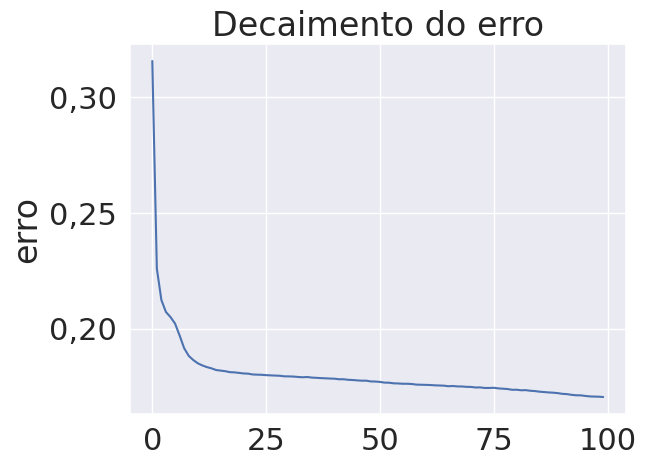

In [53]:
plt.plot(ultron2.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 2**


                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.985203      0.943406  0.945018       0.964304       0.947269
recall         0.411278      0.999371  0.945018       0.705325       0.945018
f1-score       0.580305      0.970582  0.945018       0.775444       0.934512
support    10037.000000  98563.000000  0.945018  108600.000000  108600.000000


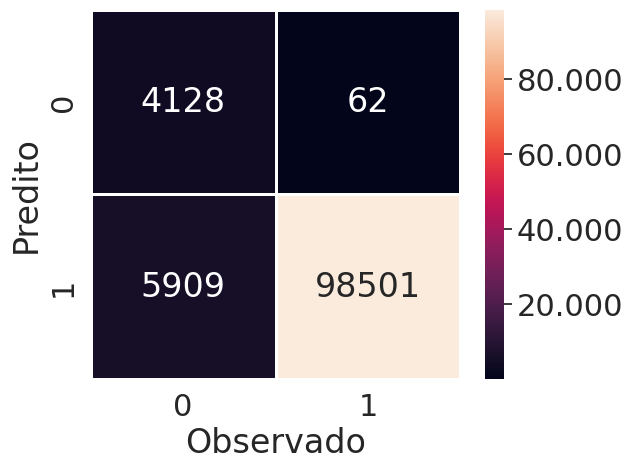

In [54]:
out2_pred_test2 = ultron2.predict(test_in2n)
out2_pred_test2_df = pd.DataFrame(out2_pred_test2)
out2_des_pred_test2 = scaler_test_out2n.inverse_transform(out2_pred_test2_df)
save_classifaction_report(test_out2,out2_des_pred_test2,'./ann_models/pre_data_filling/reports/ultron2_test_report.pkl')
plot_confusion_matrix(test_out2,out2_des_pred_test2)

### **Analising model with train data - case 2**


                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.975649       0.943619  0.944885       0.959634       0.946589
recall         0.416035       0.998939  0.944885       0.707487       0.944885
f1-score       0.583328       0.970491  0.944885       0.776910       0.934589
support    23498.000000  229900.000000  0.944885  253398.000000  253398.000000


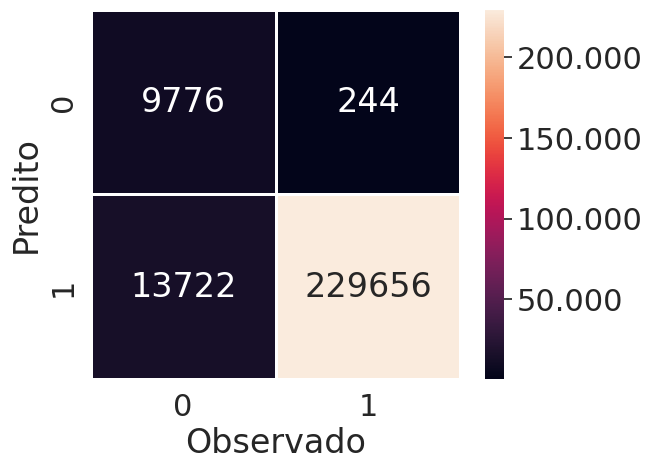

In [55]:
out2_pred_train2 = ultron2.predict(train_in2n)
out2_pred_train2_df = pd.DataFrame(out2_pred_train2)
out2_des_pred_train2 = scaler_train_out2n.inverse_transform(out2_pred_train2_df)
save_classifaction_report(train_out2,out2_des_pred_train2,'./ann_models/pre_data_filling/reports/ultron2_train_report.pkl')
plot_confusion_matrix(train_out2,out2_des_pred_train2)

# Case 3: Desconsiderando P-TPT e P-MON-CKP

### **Definindo parâmetros da rede com GridSearch - Caso 3**

In [56]:

ultron3 = train_model_if_doesnt_exist(train_in3n,train_out3n,parameters2,'./ann_models/pre_data_filling/ultron3_PRP.pkl')


In [57]:
ultron3

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(6, 4, 4),
              learning_rate='adaptive', max_iter=100)

In [58]:
ultron3.get_params()

{'activation': 'tanh',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (6, 4, 4),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

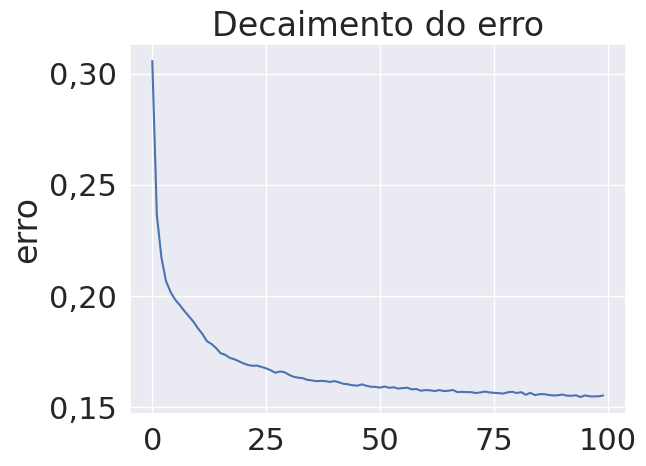

In [59]:
plt.plot(ultron3.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 3**


                   0.0           5.0  accuracy      macro avg   weighted avg
precision     0.693486      0.964199  0.941087       0.828843       0.939307
recall        0.643901      0.971181  0.941087       0.807541       0.941087
f1-score      0.667774      0.967677  0.941087       0.817726       0.940101
support    9986.000000  98614.000000  0.941087  108600.000000  108600.000000


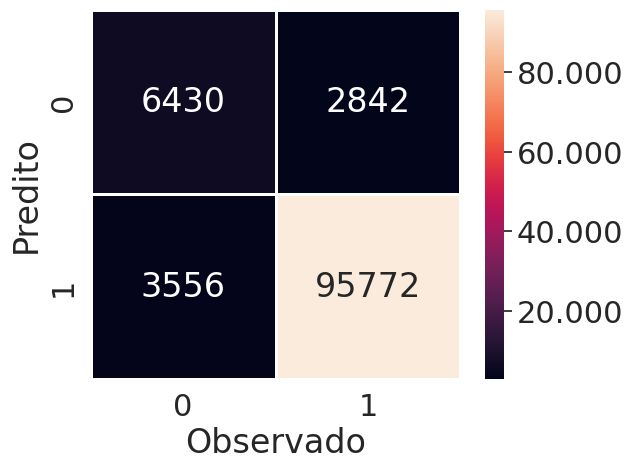

In [60]:
out3_pred_test3 = ultron3.predict(test_in3n)

out3_pred_df_test3 = pd.DataFrame(out3_pred_test3)
out3_des_pred_test3 = scaler_test_out3n.inverse_transform(out3_pred_df_test3)

save_classifaction_report(test_out3,out3_des_pred_test3,'./ann_models/pre_data_filling/reports/ultron3_test_report.pkl')
plot_confusion_matrix(test_out3,out3_des_pred_test3)

### **Analising model with train data - case 3**


                    0.0            5.0  accuracy      macro avg   weighted avg
precision      0.698858       0.963116  0.940741       0.830987       0.938558
recall         0.636715       0.971890  0.940741       0.804303       0.940741
f1-score       0.666341       0.967483  0.940741       0.816912       0.939497
support    23549.000000  229849.000000  0.940741  253398.000000  253398.000000


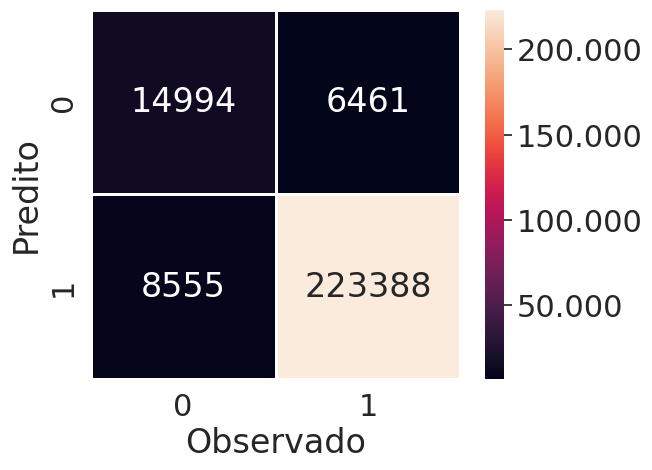

In [61]:
out3_pred_train3 = ultron3.predict(train_in3n)
out3_pred_train3_df = pd.DataFrame(out3_pred_train3)
out3_des_pred_train3 = scaler_train_out3n.inverse_transform(out3_pred_train3_df)

save_classifaction_report(train_out3,out3_des_pred_train3,'./ann_models/pre_data_filling/reports/ultron3_train_report.csv')
plot_confusion_matrix(train_out3,out3_des_pred_train3)

# ROC curve

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score


In [63]:
y_pred_prob_ultron1 = ultron1.predict_proba(test_in1n)[:, 1]
# y_pred_prob_ultron2 = ultron2.predict_proba(test_in2n)[:, 1]
y_pred_prob_ultron3 = ultron3.predict_proba(test_in3n)[:, 1]

In [64]:
fpr1, tpr1, thresholds1 = roc_curve(test_out1n, y_pred_prob_ultron1)  # Calcule os valores de taxa de falsos positivos, taxa de verdadeiros positivos e limiares
roc_auc1 = roc_auc_score(test_out1n, y_pred_prob_ultron1)  # Calcule a área sob a curva ROC (AUC-ROC)

# fpr2, tpr2, thresholds2 = roc_curve(test_out2n, y_pred_prob_ultron2)
# roc_auc2 = roc_auc_score(test_out2n, y_pred_prob_ultron2) 

fpr3, tpr3, thresholds3 = roc_curve(test_out3n, y_pred_prob_ultron3)
roc_auc3 = roc_auc_score(test_out3n, y_pred_prob_ultron3) 

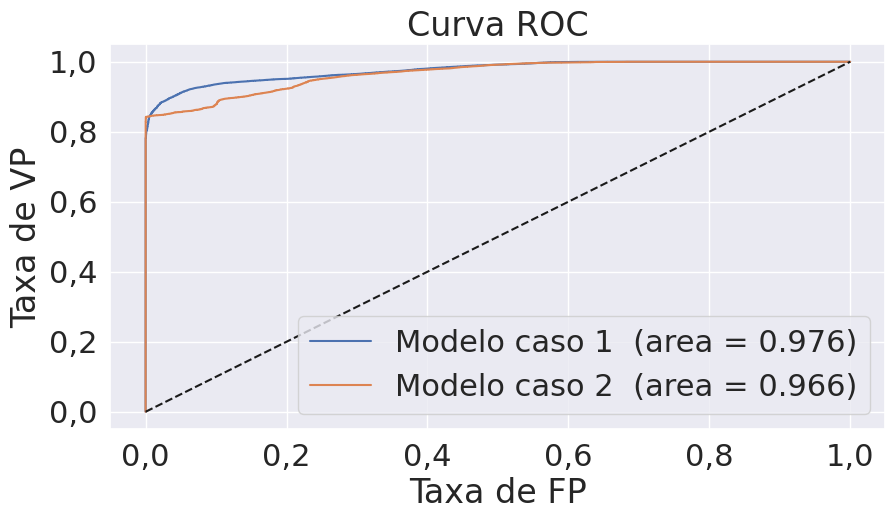

In [65]:
sns.set(font_scale=2)

fig = plt.figure(figsize=(10,5))
plt.plot(fpr1, tpr1, label=f'Modelo caso 1  (area = {round(roc_auc1,3)})')  # Plotar a curva ROC
# plt.plot(fpr2, tpr2, label=f'Modelo caso 2  (area = {round(roc_auc2,3)})')
plt.plot(fpr3, tpr3, label=f'Modelo caso 2  (area = {round(roc_auc3,3)})')
plt.plot([0, 1], [0, 1], 'k--')  # Plotar linha diagonal para referência


plt.xlabel('Taxa de FP')
plt.ylabel('Taxa de VP')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()  # Mostrar o gráfico


Best Curve, **Case 1**: 0.976 AUC 

Legends:
- no filling : NF
- smoot filled: SF
- real filled: RF
- case 1: C1
- case 2: C2
- case 3: C3

In [66]:
import csv
with open('./NF/FPR1_NF_C1.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(fpr1)
with open('./NF/TPR1_NF_C1.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(tpr1)


# with open('./NF/FPR1_NF_C2.csv','w') as f:
#     writer = csv.writer(f)
#     writer.writerow(fpr2)
# with open('./NF/TPR1_NF_C2.csv','w') as f:
#     writer = csv.writer(f)
#     writer.writerow(tpr2)


with open('./NF/FPR1_NF_C3.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(fpr3)
with open('./NF/TPR1_NF_C3.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(tpr3)

In [67]:

def performance_metrics(Y_true,Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_true, Y_pred).ravel()
    recall = tp / (tp+fn)
    precision = tp / (tp+fp)
    specificity = tn / (tn+fp)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    f1_score = tp / (tp + ((fn+fp)/2))
    data = {
        'recall':[recall],
        'precision':[precision],
        'specificity':[specificity],
        'accuracy':[accuracy],
        'f1_score':[f1_score],
    }
    return pd.DataFrame(data)


In [68]:
metrics1_test = performance_metrics(test_out1,out1_des_pred_test1)
metrics2_test = performance_metrics(test_out2,out2_des_pred_test2)

In [69]:
metrics1_train = performance_metrics(train_out1,out_des_pred1_train1)
metrics2_train = performance_metrics(train_out3,out3_des_pred_train3)

In [106]:
def make_bar_plot(metrics1,metrics2,title="Comparação de Métricas de Performance"):   
    sns.set(font_scale=1)
    modelos = ['Caso 1', 'Caso 2']
    metricas = ['Recall', 'Precisão', 'Especificidade', 'Acurácia', 'F1-Score']
    valores_modelo_a = list(metrics1.values[0])
    valores_modelo_b = list(metrics2.values[0])
    width = 0.35
    posicao_metricas = np.arange(len(metricas))

    fig, ax = plt.subplots(figsize=(9,6))
    rects1 = ax.bar(posicao_metricas, valores_modelo_a, width, label='Caso 1')
    rects2 = ax.bar(posicao_metricas + width, valores_modelo_b, width, label='Caso 2')
    ax.set_ylabel('Valor',fontsize=18)
    ax.set_title(title,fontsize=18)
    ax.set_xticks(posicao_metricas + width / 2)
    ax.set_xticklabels(metricas,fontsize=18)
    ax.legend(loc='lower right',fontsize=18)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    # Exibição do gráfico
    plt.tight_layout()
    plt.show()

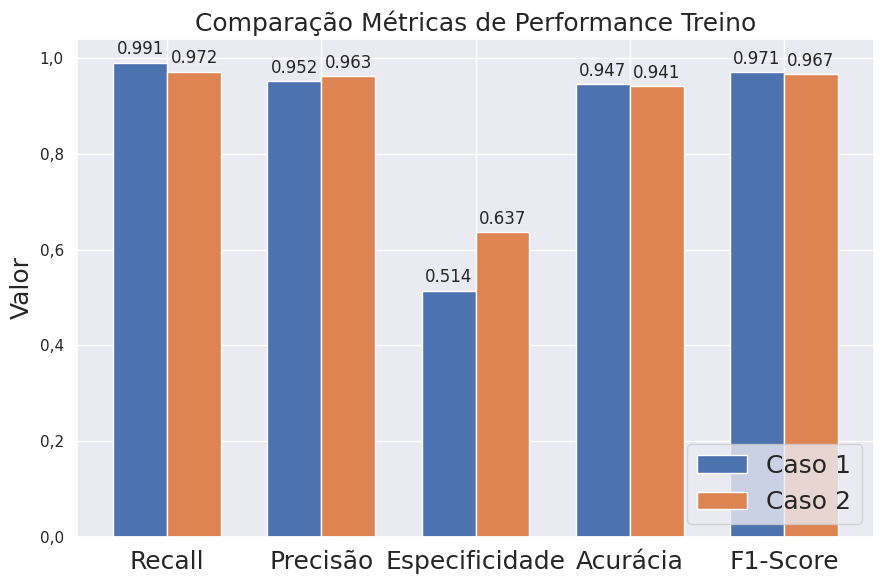

In [108]:
make_bar_plot(metrics1_train,metrics2_train,'Comparação Métricas de Performance Treino')

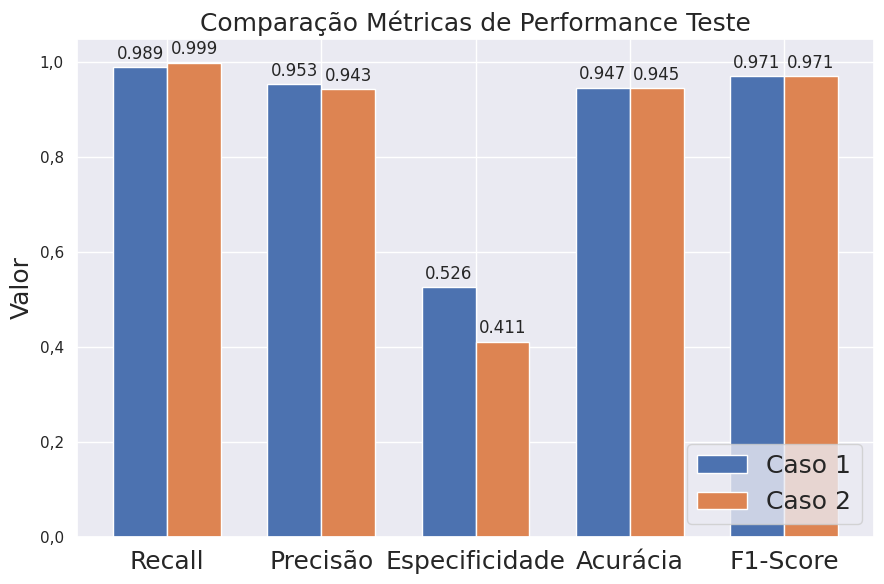

In [107]:
make_bar_plot(metrics1_test,metrics2_test,'Comparação Métricas de Performance Teste')

Save metrics

In [109]:
save_csv_if_doesnt_exist(metrics1_test,'./metrics/analysis1/test_case1_metrics.csv')
save_csv_if_doesnt_exist(metrics2_test,'./metrics/analysis1/test_case2_metrics.csv')
save_csv_if_doesnt_exist(metrics1_train,'./metrics/analysis1/train_case1_metrics.csv')
save_csv_if_doesnt_exist(metrics1_train,'./metrics/analysis1/train_case2_metrics.csv')